<a href="https://colab.research.google.com/github/ShreyankKiniT/HumanActivityRecog/blob/master/HAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data from drive to colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print("Tensorflow Version:"+tf.__version__) 

Tensorflow Version:2.3.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
%matplotlib inline

In [ ]:
file=open("/content/drive/My Drive/COLAB DATA/WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt")
lines= file.readlines()
processedList=[]
for i,line in enumerate(lines):
  try:
    line=line.split(",")
    last=line[5].split(";")[0]
    last=last.strip()
    if last =="":
      break;
    temp=[line[0],line[1],line[2],line[3],line[4],last]
    processedList.append(temp)
  except:
    print("Error at line number:",i)


Error at line number: 281873
Error at line number: 281874
Error at line number: 281875


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
processedList

[['33', 'Jogging', '49105962326000', '-0.6946377', '12.680544', '0.50395286'],
 ['33', 'Jogging', '49106062271000', '5.012288', '11.264028', '0.95342433'],
 ['33', 'Jogging', '49106112167000', '4.903325', '10.882658', '-0.08172209'],
 ['33', 'Jogging', '49106222305000', '-0.61291564', '18.496431', '3.0237172'],
 ['33', 'Jogging', '49106332290000', '-1.1849703', '12.108489', '7.205164'],
 ['33', 'Jogging', '49106442306000', '1.3756552', '-2.4925237', '-6.510526'],
 ['33', 'Jogging', '49106542312000', '-0.61291564', '10.56939', '5.706926'],
 ['33', 'Jogging', '49106652389000', '-0.50395286', '13.947236', '7.0553403'],
 ['33', 'Jogging', '49106762313000', '-8.430995', '11.413852', '5.134871'],
 ['33', 'Jogging', '49106872299000', '0.95342433', '1.3756552', '1.6480621'],
 ['33', 'Jogging', '49106982315000', '-8.19945', '19.57244', '2.7240696'],
 ['33', 'Jogging', '49107092330000', '1.4165162', '5.7886477', '2.982856'],
 ['33', 'Jogging', '49107202316000', '-1.879608', '-2.982856', '-0.2996

In [ ]:
columns=["user","activity","time","x","y","z"]

In [ ]:
data=pd.DataFrame(data=processedList,columns=columns)
data.head()

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user      343416 non-null  object
 1   activity  343416 non-null  object
 2   time      343416 non-null  object
 3   x         343416 non-null  object
 4   y         343416 non-null  object
 5   z         343416 non-null  object
dtypes: object(6)
memory usage: 15.7+ MB


In [ ]:
data.isnull().sum()

user        0
activity    0
time        0
x           0
y           0
z           0
dtype: int64

In [ ]:
data["activity"].value_counts()#highly skewed

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

In [ ]:
data["x"]=data["x"].astype("float")
data["y"]=data["y"].astype("float")
data["z"]=data["z"].astype("float")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user      343416 non-null  object 
 1   activity  343416 non-null  object 
 2   time      343416 non-null  object 
 3   x         343416 non-null  float64
 4   y         343416 non-null  float64
 5   z         343416 non-null  float64
dtypes: float64(3), object(3)
memory usage: 15.7+ MB


In [ ]:
activities=data['activity'].value_counts().index
activities

Index(['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing'], dtype='object')

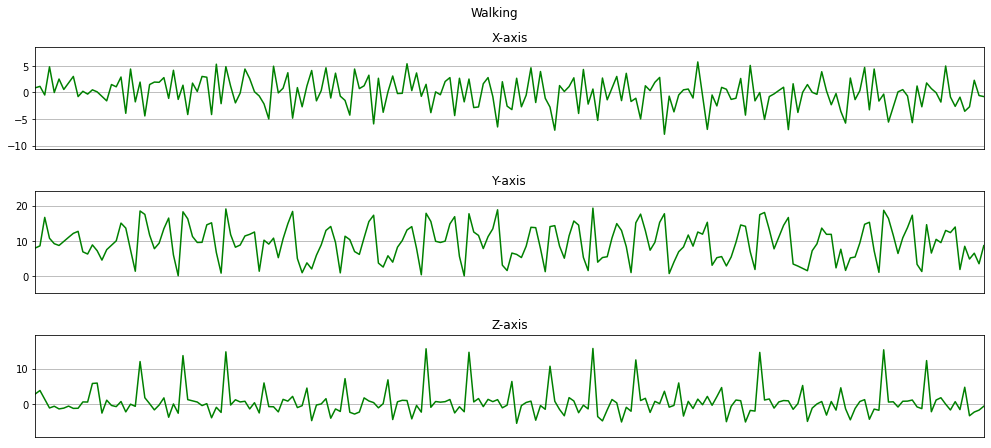

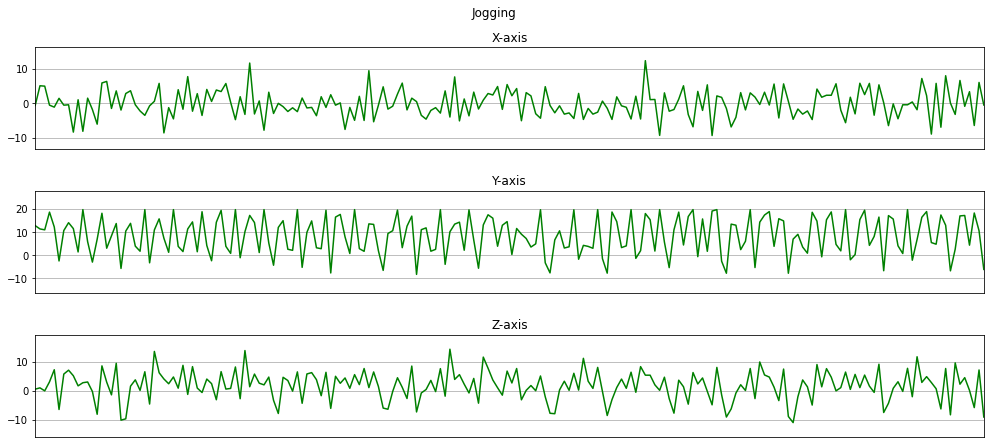

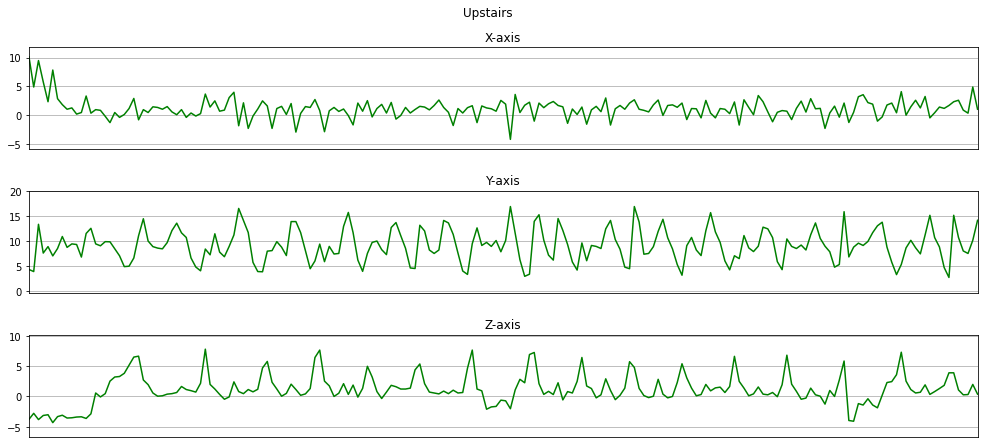

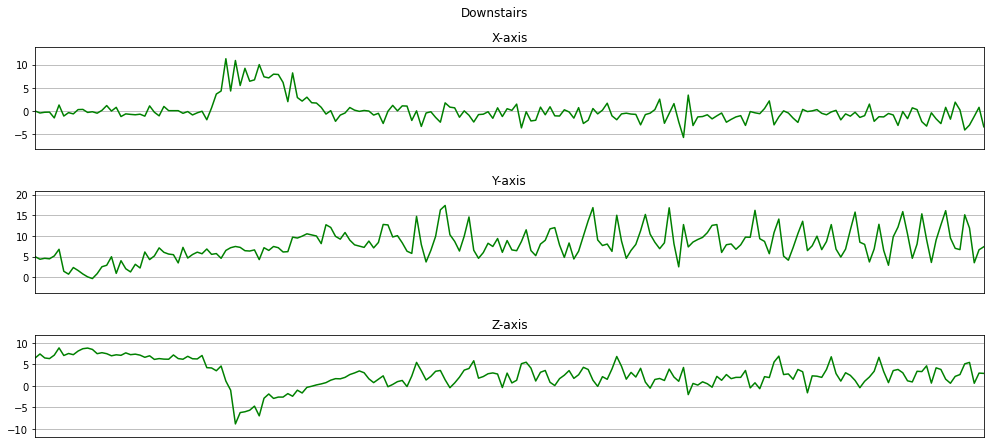

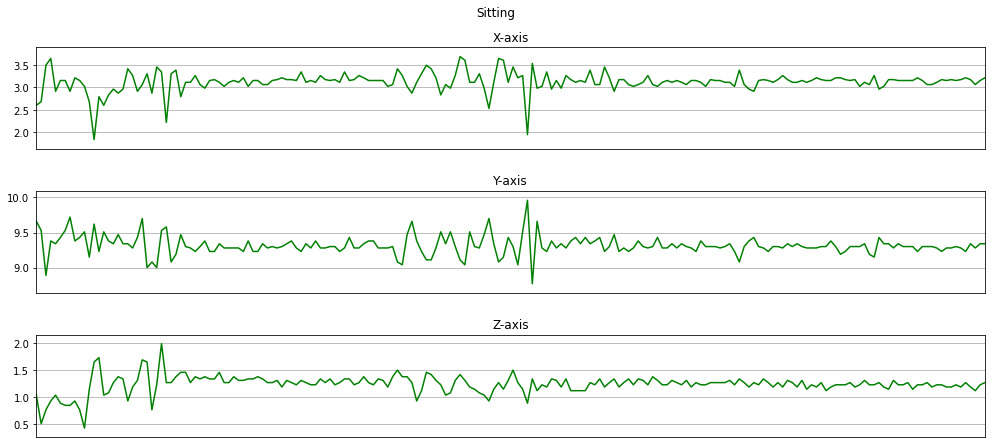

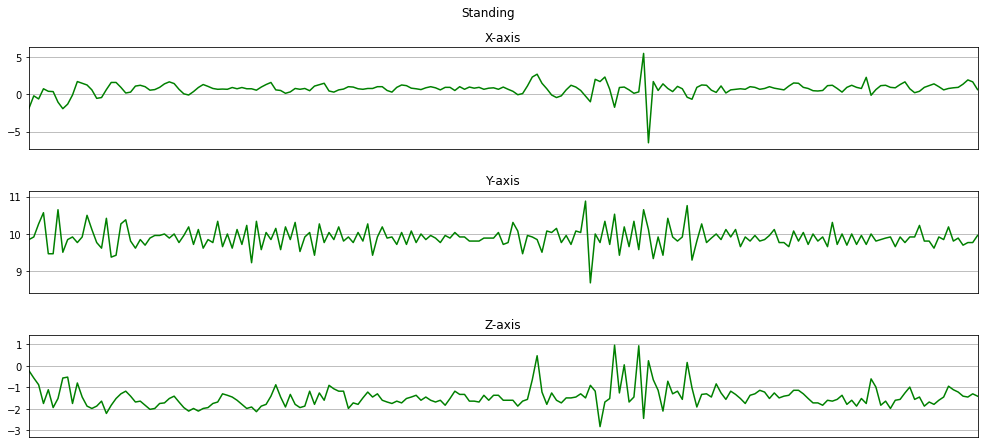

In [ ]:
def plot_activity(activity,data):
  fig,(ax0,ax1,ax2)= plt.subplots(nrows=3,figsize=(17,7),sharex=True)
  plot_axis(ax0,data['time'],data["x"],"X-axis")
  plot_axis(ax1,data['time'],data["y"],"Y-axis")
  plot_axis(ax2,data['time'],data["z"],"Z-axis")
  plt.subplots_adjust(hspace=0.4)
  fig.suptitle(activity)
  plt.subplots_adjust(top=0.90)
  plt.show()

def plot_axis(ax,x,y,title):
  ax.plot(x,y,"g")
  ax.set_title(title)
  ax.xaxis.set_visible(False)
  ax.set_ylim([min(y)-np.std(y),max(y)+np.std(y)])
  ax.set_xlim([min(x),max(x)])
  ax.grid(True)

for activity in activities:
  data_for_plot=data[(data['activity']==activity)][:20*10]#10 second of activity
  plot_activity(activity,data_for_plot)

In [ ]:
df=data.drop(['user','time'],axis=1).copy()
df.head()

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


In [ ]:
df['activity'].value_counts() # TRY SMOTE LATER ON!!

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

In [ ]:
Walking=df[df['activity']=="Walking"].head(3555).copy()
Jogging=df[df['activity']=="Jogging"].head(3555).copy()
Upstairs=df[df['activity']=="Upstairs"].head(3555).copy()
Downstairs=df[df['activity']=="Downstairs"].head(3555).copy()
Sitting=df[df['activity']=="Sitting"].head(3555).copy()
Standing=df[df['activity']=="Standing"].head(3555).copy()

In [ ]:
balanced_data=pd.DataFrame()
balanced_data=balanced_data.append([Walking,Jogging,Upstairs,Downstairs,Sitting,Standing])
balanced_data.shape

(21330, 4)

In [ ]:
balanced_data.head()

,activity,x,y,z
597,Walking,0.844462,8.008764,2.792171
598,Walking,1.116869,8.621680,3.786457
599,Walking,-0.503953,16.657684,1.307553
600,Walking,4.794363,10.760075,-1.184970
601,Walking,-0.040861,9.234595,-0.694638


In [ ]:
balanced_data['activity'].value_counts()

Upstairs      3555
Standing      3555
Sitting       3555
Downstairs    3555
Walking       3555
Jogging       3555
Name: activity, dtype: int64

In [ ]:
label=LabelEncoder()
balanced_data['label']=label.fit_transform(balanced_data['activity'])
balanced_data.head()#x,y,z is not in same variance need to standardize

,activity,x,y,z,label
597,Walking,0.844462,8.008764,2.792171,5
598,Walking,1.116869,8.621680,3.786457,5
599,Walking,-0.503953,16.657684,1.307553,5
600,Walking,4.794363,10.760075,-1.184970,5
601,Walking,-0.040861,9.234595,-0.694638,5


In [ ]:
label.classes_ #0 to 5

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

In [ ]:
X=balanced_data[['x','y','z']]
y=balanced_data['label']

In [ ]:
sc=StandardScaler()
X=sc.fit_transform(X)
scaled_X=pd.DataFrame(data=X,columns=["x","y","z"])
scaled_X


,x,y,z
0,0.000503,-0.099190,0.337933
1,0.073590,0.020386,0.633446
2,-0.361275,1.588160,-0.103312
3,1.060258,0.437573,-0.844119
4,-0.237028,0.139962,-0.698386
...,...,...,...
21325,-0.470217,0.178084,0.261019
21326,-0.542658,0.193692,0.248875
21327,-0.628514,0.197593,0.261019
21328,-0.781444,0.049322,0.155768


In [ ]:
scaled_X['label']=y.values
scaled_X.head()

,x,y,z,label
0,0.000503,-0.099190,0.337933,5
1,0.073590,0.020386,0.633446,5
2,-0.361275,1.588160,-0.103312,5
3,1.060258,0.437573,-0.844119,5
4,-0.237028,0.139962,-0.698386,5


In [ ]:
#making 2d array for 5 sec block each towards prediction framing
import scipy.stats as stats

In [ ]:
Fs=20
frame_size=Fs*5 #100
hop_size=Fs*2 #40

In [ ]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['x'].values[i: i + frame_size]
        y = df['y'].values[i: i + frame_size]
        z = df['z'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

X, y = get_frames(scaled_X, frame_size, hop_size)

X.shape, y.shape #3555*6/40

((531, 100, 3), (531,))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [ ]:
X_train.shape,X_test.shape

((424, 100, 3), (107, 100, 3))

In [ ]:
X_train=X_train.reshape(424,100,3,1)
X_test=X_test.reshape(107,100,3,1)

In [ ]:
X_train[0].shape

(100, 3, 1)

In [ ]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 20, validation_data= (X_test, y_test), verbose=1)

Epoch 1/20
14/14 [==============================] - 0s 23ms/step - loss: 1.5973 - accuracy: 0.2689 - val_loss: 1.3093 - val_accuracy: 0.5794
Epoch 2/20
14/14 [==============================] - 0s 11ms/step - loss: 1.1926 - accuracy: 0.6014 - val_loss: 0.9111 - val_accuracy: 0.7383
Epoch 3/20
14/14 [==============================] - 0s 12ms/step - loss: 0.8371 - accuracy: 0.7382 - val_loss: 0.5578 - val_accuracy: 0.8411
Epoch 4/20
14/14 [==============================] - 0s 12ms/step - loss: 0.6247 - accuracy: 0.7736 - val_loss: 0.4096 - val_accuracy: 0.8505
Epoch 5/20
14/14 [==============================] - 0s 12ms/step - loss: 0.4190 - accuracy: 0.8726 - val_loss: 0.3168 - val_accuracy: 0.8879
Epoch 6/20
14/14 [==============================] - 0s 11ms/step - loss: 0.3864 - accuracy: 0.8561 - val_loss: 0.2929 - val_accuracy: 0.8785
Epoch 7/20
14/14 [==============================] - 0s 12ms/step - loss: 0.3010 - accuracy: 0.8868 - val_loss: 0.2520 - val_accuracy: 0.9065
Epoch 8/20
14

In [ ]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

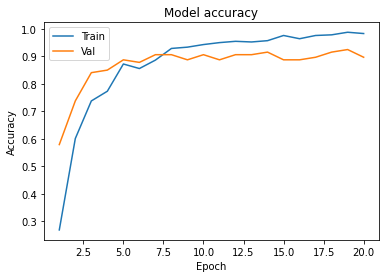

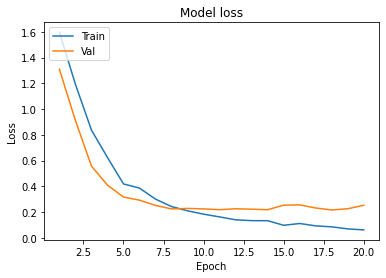

In [ ]:
plot_learningCurve(history, 20)

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
!pip install mlxtend

In [ ]:
y_pred = model.predict_classes(X_test)

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6ea8218e48>)

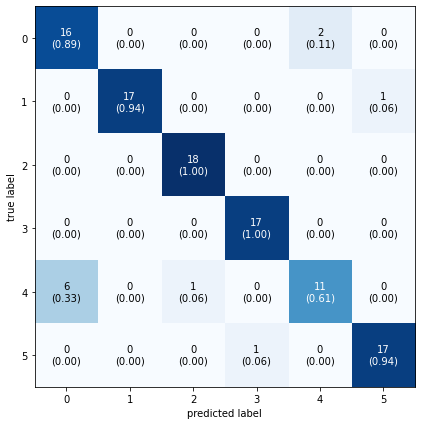

In [ ]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(7,7))

In [ ]:
model.save_weights('HAR.h5')